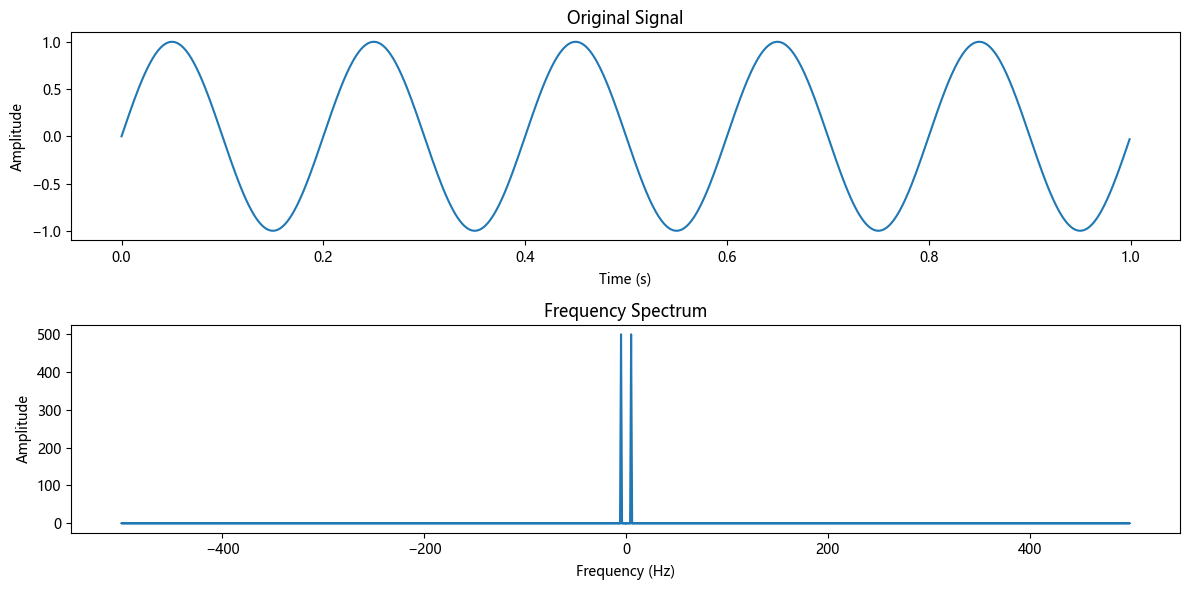

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# 生成一个信号
fs = 1000  # 采样频率
t = np.arange(0, 1, 1/fs)  # 时间数组
freq = 5  # 信号频率
signal = np.sin(2 * np.pi * freq * t)

# 进行 FFT
fft_result = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(len(fft_result), 1/fs)

# 绘制原始信号和频谱图
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(fft_freq, np.abs(fft_result))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# space
# fft_result = torch.fft.rfft(inputs, dim=1)
# magnitude_spectrum = torch.abs(fft_result[:, :256])  #[256, 512]

In [26]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family='Microsoft YaHei')

# 读取MAT文件   
data1 = loadmat('0_0.mat')  # 正常信号
data2 = loadmat('inner_0.17.mat') # 0.021英寸 内圈
data3 = loadmat('21_2.mat') # 0.021英寸 滚珠
data4 = loadmat('21_3.mat') # 0.021英寸 外圈
# 注意，读取出来的data是字典格式，可以通过函数type(data)查看。 

In [ ]:
data1['X097_DE_time'].shape  

(243938, 1)

In [ ]:
data1['X097_DE_time'] = data1['X097_DE_time'].reshape(-1) 
type(data1['X097_DE_time'])
data1['X097_DE_time']

array([ 0.05319692,  0.08866154,  0.09971815, ..., -0.03463015,
        0.01668923,  0.04693846])

In [27]:
# DE - drive end accelerometer data 驱动端加速度数据
data_list1 = data1['X097_DE_time'].reshape(-1) 
data_list2 = data2['X105_DE_time'].reshape(-1)  
data_list3 = data3['X222_DE_time'].reshape(-1) 
data_list4 = data4['X234_DE_time'].reshape(-1) 

time_step= 1024
# 划窗取值（1024）
data_list1 = data_list1[0:time_step]
data_list2 = data_list2[0:time_step]
data_list3 = data_list3[0:time_step]
data_list4 = data_list4[0:time_step]

x_list = [x for x in range(time_step)]
# 将数据列表转换为DataFrame
df1 = pd.DataFrame(data_list1)
df2 = pd.DataFrame(data_list2)
df3 = pd.DataFrame(data_list3)
df4 = pd.DataFrame(data_list4)
# 将DataFrame保存为Excel文件
df2.to_excel('inner_17.xlsx', index=False)


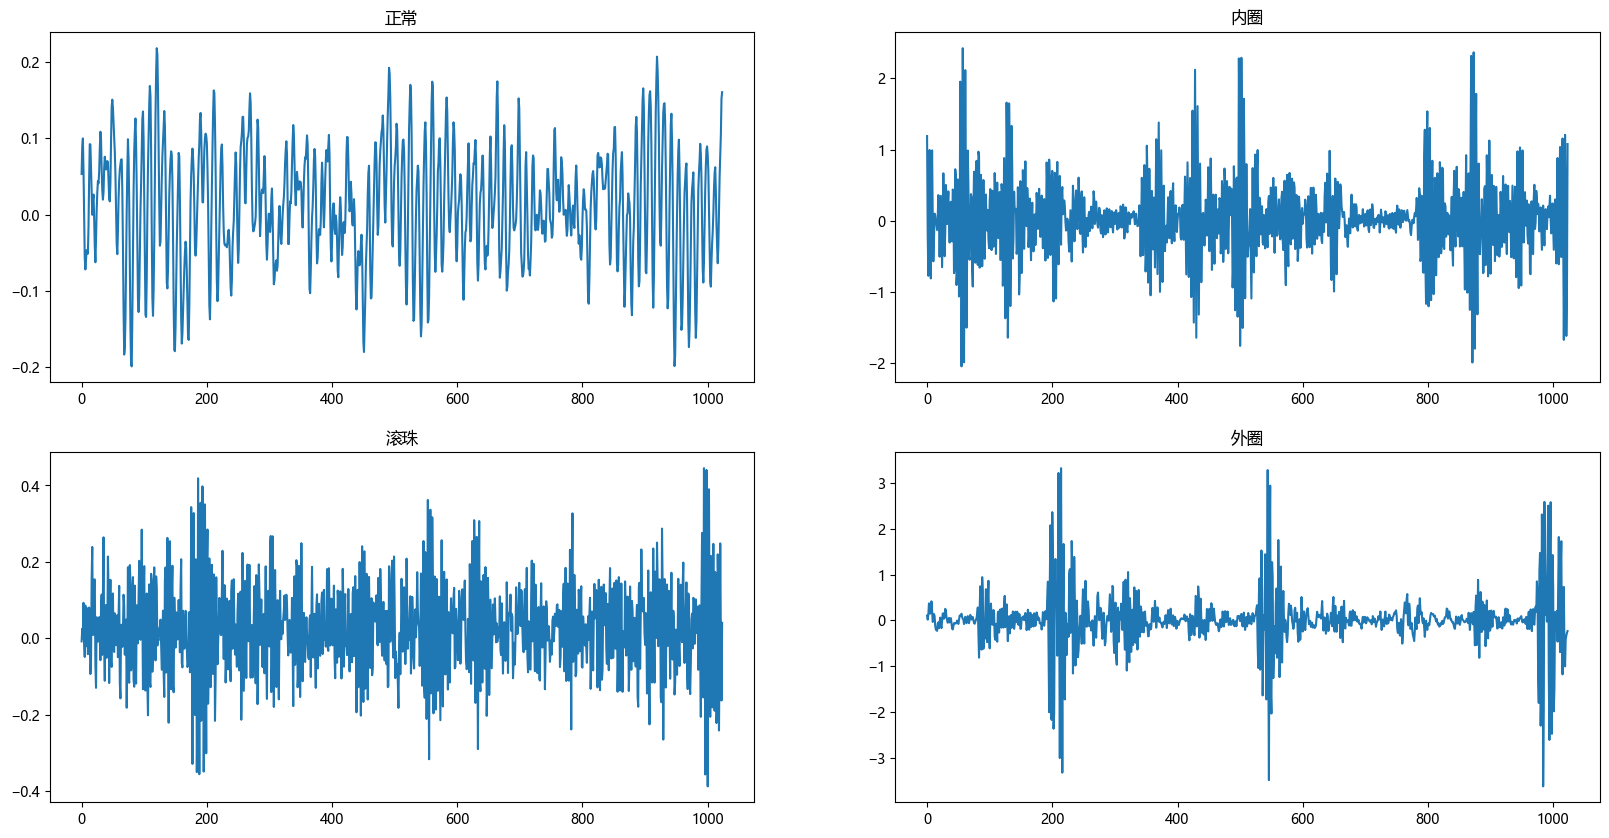

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(data_list1)
plt.title('正常')
plt.subplot(2,2,2)
plt.plot(data_list2)
plt.title('内圈')
plt.subplot(2,2,3)
plt.plot(data_list3)
plt.title('滚珠')
plt.subplot(2,2,4)
plt.plot(data_list4)
plt.title('外圈')

plt.show()

快速傅里叶变换FFT

In [ ]:
fs = 1024
# 进行 FFT
fft_result1 = np.fft.fft(data_list1)
fft_freq1 = np.fft.fftfreq(len(fft_result1), 1/fs)

fft_result2 = np.fft.fft(data_list2)
fft_freq2 = np.fft.fftfreq(len(fft_result2), 1/fs)

fft_result3 = np.fft.fft(data_list3)
fft_freq3 = np.fft.fftfreq(len(fft_result3), 1/fs)

fft_result4 = np.fft.fft(data_list4)
fft_freq4 = np.fft.fftfreq(len(fft_result4), 1/fs)

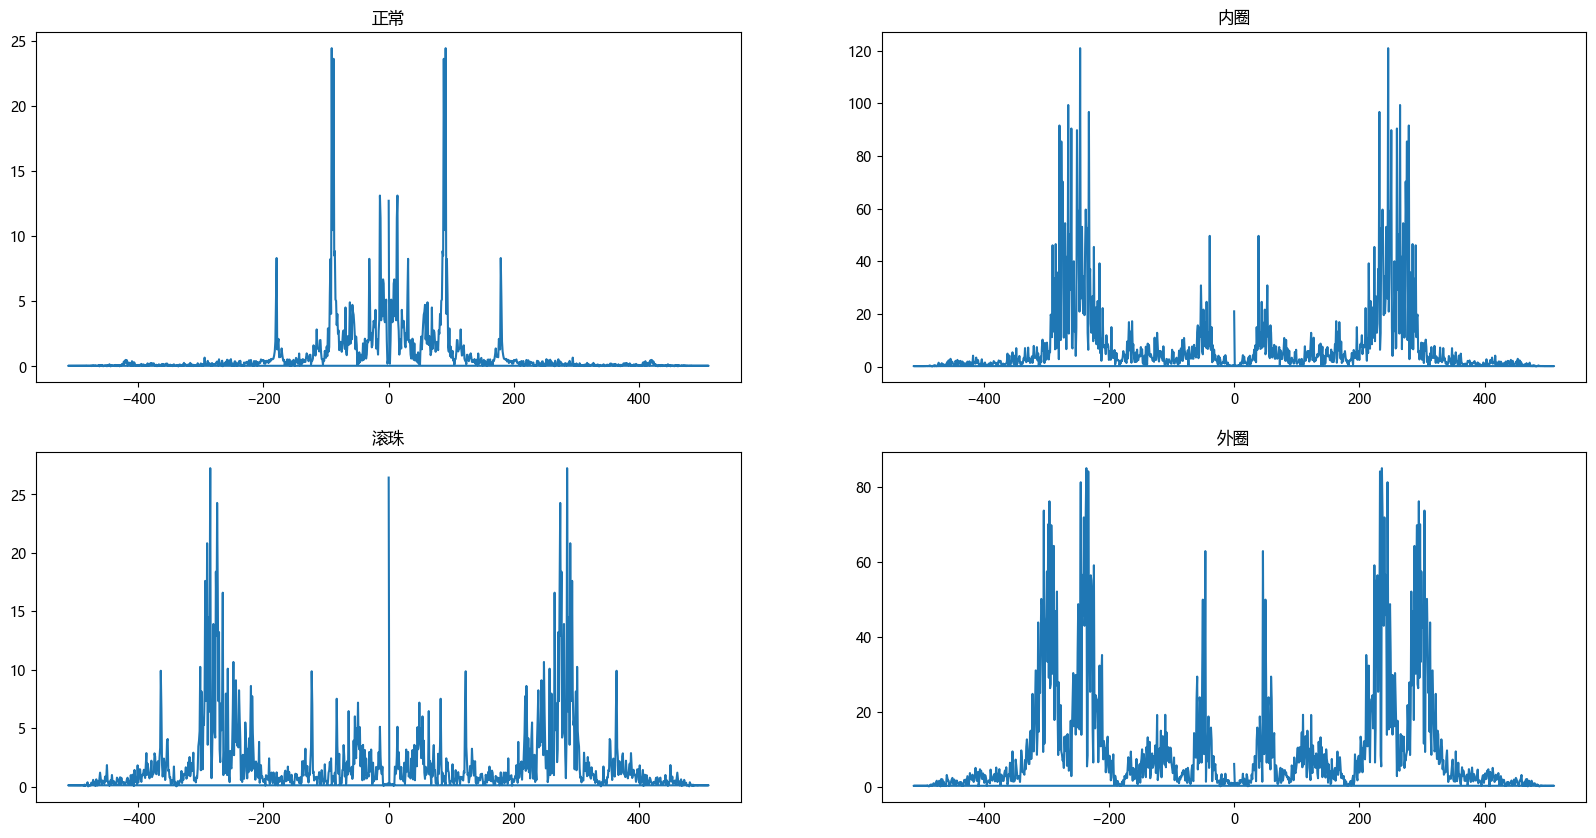

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(fft_freq1, np.abs(fft_result1))
plt.title('正常')
plt.subplot(2,2,2)
plt.plot(fft_freq2, np.abs(fft_result2))
plt.title('内圈')
plt.subplot(2,2,3)
plt.plot(fft_freq3, np.abs(fft_result3))
plt.title('滚珠')
plt.subplot(2,2,4)
plt.plot(fft_freq4, np.abs(fft_result4))
plt.title('外圈')
plt.show()